## Bäckerei-Umsatzdaten

Wichtige Links: <br>
- [Handbuch](https://opencampus.gitbook.io/opencampus-machine-learning-program/courses/einfuehrung)

#### Woche 3 - Versionierung mit git & Datenaufbereitung
Aufgaben:
- Die Dateien umsatzdaten_gekuerzt.csv, kiwo.csv und wetter.csv und in einem Pandas Dataframe zusammenführen.
- Euch im Team treffen und aufteilen, wer für welche Variablen deskriptive Statistiken und Visualisierungen erstellt.
- Deskriptive Statistiken und Visualisierungen zu den jeweiligen Variablen erstellen.


In [9]:
#Einlesen der umsatzdaten_gekuerzt.csv Datei
import pandas as pd
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
df_umsatzdaten = pd.read_csv(umsatz_csv_url)

#Einlesen von kiwo.csv
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
df_kiwo = pd.read_csv(kiwo_csv_url)

#Einlesen von wetter.csv
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'
df_wetter = pd.read_csv(wetter_csv_url)

print(df_umsatzdaten.head())
print(df_umsatzdaten.shape)
print(df_kiwo.head())
print(df_kiwo.shape)
print(df_wetter.head())
print(df_wetter.shape)

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
(9334, 3)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
(72, 2)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
(2601, 5)


In [10]:
#Zusammenführung der Dataframes

df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

#Problem: Nur übereinstimmende Werte für 'Datum' werden im zusammengeführten Dataframe angezeigt

print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.shape) 

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
(9334, 8)


In [11]:
Wolke=df_umsatz_kiwo_wetter.groupby('Bewoelkung').agg({'Umsatz':['mean','std','var']})
print(Wolke)

                Umsatz                          
                  mean         std           var
Bewoelkung                                      
0.0         224.069716  151.981036  23098.235430
1.0         220.113238  145.765984  21247.722147
2.0         214.249575  140.879276  19846.970370
3.0         229.194492  155.763811  24262.364903
4.0         219.106433  159.676600  25496.616458
5.0         215.525907  142.309416  20251.969951
6.0         208.701148  149.946809  22484.045674
7.0         192.482922  137.428930  18886.710700
8.0         177.176294  118.956974  14150.761634


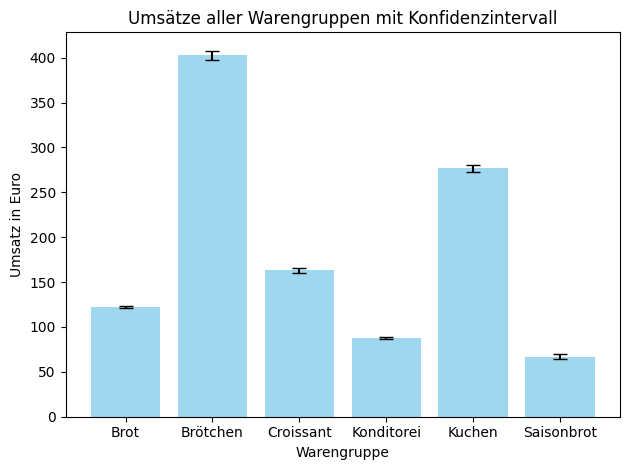

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  # Für die Konfidenzintervalle

# Beispiel-Daten
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Mittelwerte und Standardabweichungen initialisieren
mean_umsatz = np.ones(len(Warengruppe))
std_umsatz = np.ones(len(Warengruppe))
n = np.ones(len(Warengruppe))  # Stichprobengröße für jede Warengruppe

for i in range(len(Warengruppe)):
    # Beispiel: Umsatzdaten filtern und Berechnung
    warengruppe_daten = df_umsatz_kiwo_wetter.loc[df_umsatz_kiwo_wetter['Warengruppe'] == i + 1, 'Umsatz']
    mean_umsatz[i] = warengruppe_daten.mean()
    std_umsatz[i] = warengruppe_daten.std()  # Standardabweichung
    n[i] = len(warengruppe_daten)  # Stichprobengröße

# Konfidenzintervalle berechnen (95%-Konfidenzniveau)
confidence_interval = stats.t.ppf(0.95, df=n-1) * (std_umsatz / np.sqrt(n))

# Balkendiagramm mit Konfidenzintervallen
plt.bar(Warengruppe, mean_umsatz, yerr=confidence_interval, capsize=5, color='skyblue', alpha=0.8)
plt.title("Umsätze aller Warengruppen mit Konfidenzintervall")
plt.xlabel("Warengruppe")
plt.ylabel("Umsatz in Euro")
plt.xticks(Warengruppe, Backwaren)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


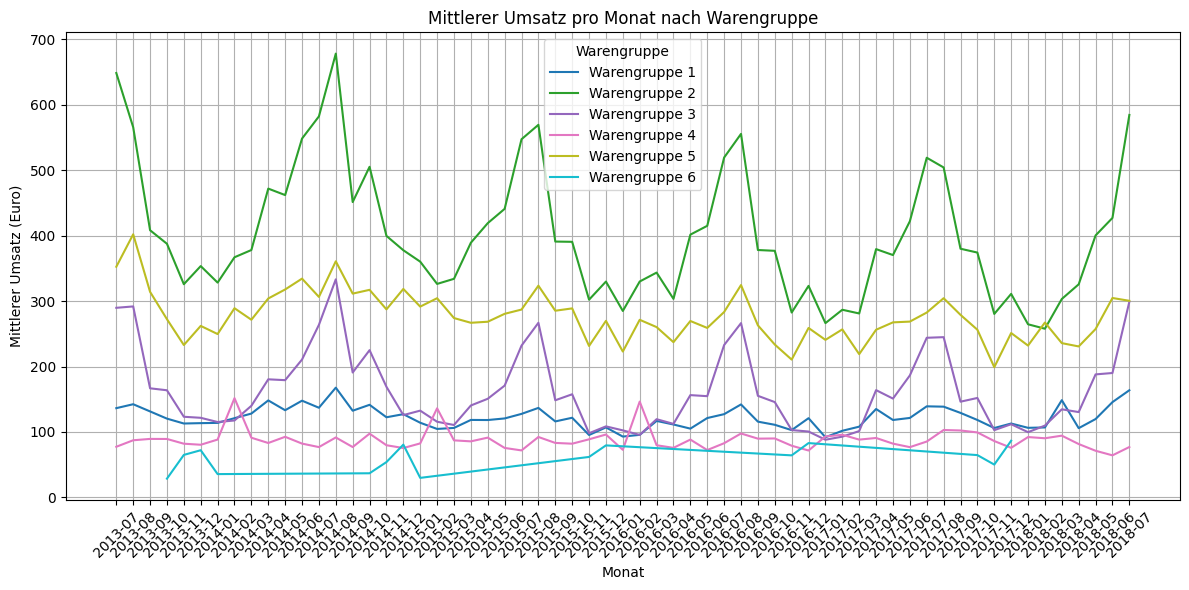

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'

df_umsatzdaten = pd.read_csv(umsatz_csv_url)
df_kiwo = pd.read_csv(kiwo_csv_url)
df_wetter = pd.read_csv(wetter_csv_url)

# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

# Datum in datetime-Format konvertieren
df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat und Jahr hinzufügen
df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.to_period('M')

# Gruppieren nach Monat und Warengruppe
grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
warengruppen = grouped['Warengruppe'].unique()
farben = plt.cm.tab10(np.linspace(0, 1, len(warengruppen)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe
for i, wg in enumerate(warengruppen):
    daten_wg = grouped[grouped['Warengruppe'] == wg]
    plt.plot(daten_wg['Monat'].astype(str), daten_wg['Umsatz'], label=f"Warengruppe {wg}", color=farben[i])

# Plot-Anpassungen
plt.title("Mittlerer Umsatz pro Monat nach Warengruppe")
plt.xlabel("Monat")
plt.ylabel("Mittlerer Umsatz (Euro)")
plt.legend(title="Warengruppe")
plt.xticks(rotation=45)  # Monatsnamen rotieren
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


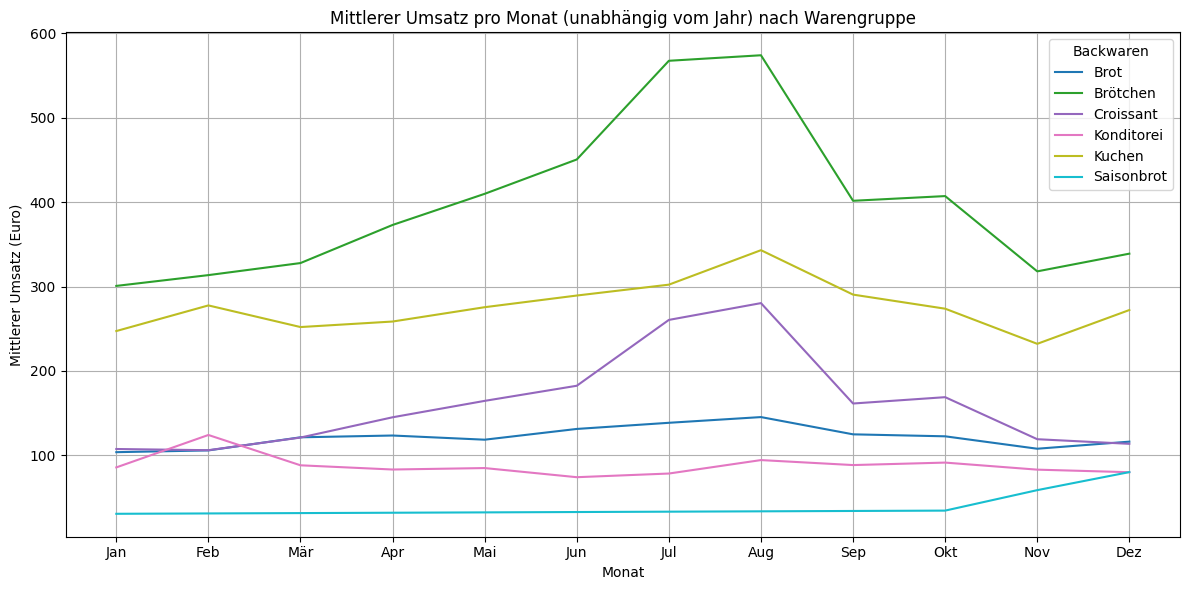

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'

df_umsatzdaten = pd.read_csv(umsatz_csv_url)
df_kiwo = pd.read_csv(kiwo_csv_url)
df_wetter = pd.read_csv(wetter_csv_url)

# Daten kombinieren
df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

# Datum in datetime-Format konvertieren
df_umsatz_kiwo_wetter['Datum'] = pd.to_datetime(df_umsatz_kiwo_wetter['Datum'])

# Monat extrahieren
df_umsatz_kiwo_wetter['Monat'] = df_umsatz_kiwo_wetter['Datum'].dt.month

# Gruppieren nach Monat (1-12) und Warengruppe
grouped = df_umsatz_kiwo_wetter.groupby(['Monat', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Liste aller Warengruppen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]
farben = plt.cm.tab10(np.linspace(0, 1, len(Warengruppe)))  # Farben für die Linien

plt.figure(figsize=(12, 6))

# Linienplot für jede Warengruppe mit Beschriftungen aus Backwaren
for i, wg in enumerate(Warengruppe):
    daten_wg = grouped[grouped['Warengruppe'] == wg]
    plt.plot(daten_wg['Monat'], daten_wg['Umsatz'], label=Backwaren[i], color=farben[i])

# Plot-Anpassungen
plt.title("Mittlerer Umsatz pro Monat (unabhängig vom Jahr) nach Warengruppe")
plt.xlabel("Monat")
plt.ylabel("Mittlerer Umsatz (Euro)")
plt.legend(title="Backwaren")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


In [15]:
# hallooo